# Objective:-Use random forest to prepare a model on fraud data treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier

In [2]:
data=pd.read_csv("C:\\Users\\hp\\Desktop\\arpit_assignment\\assignment\\12. random forest\\Fraud_check.csv")

In [3]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
data.info()
#No null value in  the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
#We will create numerical variable for categorical data
label_encoder = preprocessing.LabelEncoder()
data['Undergrad']= label_encoder.fit_transform(data['Undergrad']) 
data['Marital.Status']= label_encoder.fit_transform(data['Marital.Status']) 
data['Urban']= label_encoder.fit_transform(data['Urban']) 

In [6]:
#We will take high sales above at 7.49 beacause it is the average of sales
data["Taxable.Income"]=(data["Taxable.Income"]>30000)*1

In [7]:
#We will create the independent and dependent variable 
x=data.drop(axis=0,columns="Taxable.Income")
y=data["Taxable.Income"]

In [8]:
#Our output variable is imblance  
data["Taxable.Income"].value_counts()

1    476
0    124
Name: Taxable.Income, dtype: int64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='City.Population', ylabel='Density'>

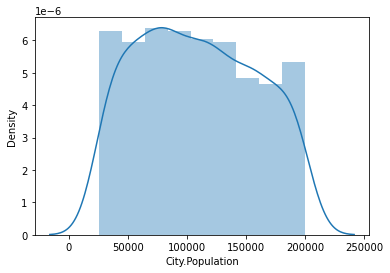

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(data["City.Population"])

<BarContainer object of 600 artists>

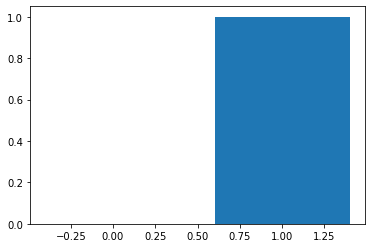

In [10]:
plt.bar(y,y.values)

In [11]:
#Now we will create random forest classification model1 with our train data
from sklearn.model_selection import train_test_split

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [13]:
model1 = RandomForestClassifier(n_estimators=100,max_depth=10,min_samples_split=20,criterion='gini')

In [14]:
model1.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_split=20)

In [15]:
from sklearn import metrics

In [16]:
Y_pred=model1.predict(x_train)

In [17]:
print("accuracy:",metrics.accuracy_score(y_train,Y_pred))

accuracy: 0.8095238095238095


In [18]:
y_pred=model1.predict(x_test)

In [19]:
print("accuracy:",metrics.accuracy_score(y_test,y_pred))

accuracy: 0.7777777777777778


In [20]:
from sklearn.metrics import confusion_matrix, classification_report
cm= confusion_matrix(y_test, y_pred) 
cm

array([[  0,  40],
       [  0, 140]], dtype=int64)

Text(0.5, 1.0, 'Accuracy Score: 0.7777777777777778')

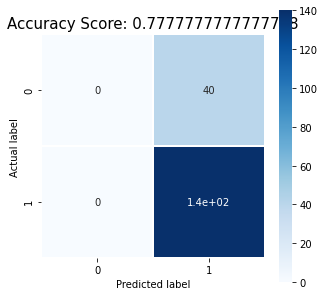

In [21]:
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(model1.score(x_test, y_test))
plt.title(all_sample_title, size = 15)

In [22]:
# Predicting the values of test data
y_pred = model1.predict(x_test)
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        40
           1       0.78      1.00      0.88       140

    accuracy                           0.78       180
   macro avg       0.39      0.50      0.44       180
weighted avg       0.60      0.78      0.68       180



C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
##We will apply cross validatation technique & create the model
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [24]:
#We will create the model applying the adaboost technique
from sklearn.ensemble import AdaBoostClassifier

In [25]:
#Accuracy of model2
num_trees = 10
kfold = KFold(n_splits=10)
model2 = AdaBoostClassifier(n_estimators=num_trees, random_state=12)
results = cross_val_score(model2, x, y, cv=kfold)
print(results.mean())

0.7916666666666666


In [26]:
model2.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=10, random_state=12)

In [27]:
from sklearn import metrics

In [28]:
Y_pred=model2.predict(x_train)

In [29]:
print("accuracy:",metrics.accuracy_score(y_train,Y_pred))

accuracy: 0.8


In [30]:
y_pred=model2.predict(x_test)

In [31]:
print("accuracy:",metrics.accuracy_score(y_test,y_pred))

accuracy: 0.7777777777777778


In [32]:
cm= confusion_matrix(y_test, y_pred) 
cm

array([[  0,  40],
       [  0, 140]], dtype=int64)

In [33]:
##We will create the model applying the baggingclassifier technique & evaluate accuracy of model2
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
kfold = KFold(n_splits=10)
cart = DecisionTreeClassifier()
num_trees =70
model3 = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=42)
results = cross_val_score(model3, x, y, cv=kfold)
print(results.mean())

0.7283333333333333


In [34]:
model3.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=70,
                  random_state=42)

In [35]:
Y_pred=model3.predict(x_train)

In [36]:
print("accuracy:",metrics.accuracy_score(y_train,Y_pred))

accuracy: 0.9976190476190476


In [37]:
y_pred=model3.predict(x_test)

In [38]:
print("accuracy:",metrics.accuracy_score(y_test,y_pred))

accuracy: 0.7055555555555556


In [39]:
cm= confusion_matrix(y_test, y_pred) 
cm

array([[  2,  38],
       [ 15, 125]], dtype=int64)

In [40]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

In [41]:
kfold = KFold(n_splits=10)

# create the sub models
estimators = []
model1 = LogisticRegression(max_iter=500)
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, x_train, y_train, cv=kfold)
print(results.mean())

0.8


In [42]:
ensemble.fit(x_train,y_train)

VotingClassifier(estimators=[('logistic', LogisticRegression(max_iter=500)),
                             ('cart', DecisionTreeClassifier()),
                             ('svm', SVC())])

In [50]:
Y_pred=ensemble.predict(x_test)

In [51]:
print("accuracy:",metrics.accuracy_score(y_test,Y_pred))

accuracy: 0.7777777777777778


In [52]:
y_pred=ensemble.predict(x_train)

In [53]:
print("accuracy:",metrics.accuracy_score(y_test,Y_pred))

accuracy: 0.7777777777777778


In [55]:
cm= confusion_matrix(y_test, Y_pred) 
cm

array([[  0,  40],
       [  0, 140]], dtype=int64)

# Conclusion:-We have created 4 different type of models using different techniques, we got different accuracies with respect to different models 
# Random forest & adaboost technique is giving better result